<a href="https://colab.research.google.com/github/eujean-star/portfolio_estudos/blob/main/arvore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CDBio - Soluções em ciência de dados e bioinformatica**
=======

In [1]:
import pandas as pd

In [2]:
!wget https://www.dropbox.com/s/skvenpz7p4szmoh/zap_imoveis.csv


--2021-09-20 15:39:01--  https://www.dropbox.com/s/skvenpz7p4szmoh/zap_imoveis.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/skvenpz7p4szmoh/zap_imoveis.csv [following]
--2021-09-20 15:39:01--  https://www.dropbox.com/s/raw/skvenpz7p4szmoh/zap_imoveis.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7985888c85309eca1a61b0948.dl.dropboxusercontent.com/cd/0/inline/BWhFuwVSAHXS7-KIcsoEhisjzehvpbg38ZZXe1LnmerVlRMd5DLwC1YMy_SSu1K9kX0s6AlciZ-Mz9nWZ-YqDArKvJfnWEI5rESaU3ZFL-6OP4o01GUktgojymDlbfCCBMoFFWkAbK_9aN3ha6KQipRe/file# [following]
--2021-09-20 15:39:01--  https://ucf7985888c85309eca1a61b0948.dl.dropboxusercontent.com/cd/0/inline/BWhFuwVSAHXS7-KIcsoEhisjzehvpbg38ZZXe1LnmerVlRMd5DLwC1YMy_SSu1K9kX0s6AlciZ-Mz9nWZ

In [3]:
data_imoveis = pd.read_csv('zap_imoveis.csv')


In [4]:
data_imoveis

,Unnamed: 0,condominio,anunciante,num_suites,num_vagas,num_quartos,area,rua,regiao,descricao,tipo_imovel,localidade,bairro,preco
0,0,0.0,HELDER LOPES IMOVEIS,2.0,2.0,3.0,150.0,Rua Tomaz Soares Vieira,RS,Sobrado Moderno Bougainville\r\n\r\nÓtima opor...,Casa,Pelotas,Laranjal,570000
1,1,0.0,HELDER LOPES IMOVEIS,0.0,0.0,0.0,360.0,Rua Professora Vanda da Silva Chagas,RS,Terreno Colina do Sol \r\n\r\nÁREA TOTAL – 36...,Casa,Pelotas,Colina da Sol,200000
2,2,18.0,Fernanda,0.0,1.0,2.0,45.0,Rua Maestro Mendanha,RS,"Apartamento central, condomínio Reservas D´our...",Casa,Pelotas,Centro,170000
3,3,230.0,Alex Lara,0.0,1.0,2.0,55.0,Avenida Presidente Juscelino Kubitschek de Oli...,RS,Apartamento em condomínio fechado\r\n2 dormitó...,Casa,Pelotas,Centro,250000
4,4,680.0,Maria,1.0,1.0,3.0,147.0,Rua Almirante Barroso,RS,Excelente apartamento com 3 dormitórios sendo ...,Casa,Pelotas,Centro,600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3939,3939,0.0,KROLOW NEGÓCIOS IMOBILIÁRIOS,0.0,1.0,3.0,76.0,Um Lot. Jacarandá,RS,"Chalé de madeiras Grapea e Ipê (duplado), 03 d...",Casa,Pelotas,Fragata,192000
3940,3940,0.0,VILLAR IMÓVEIS,1.0,2.0,3.0,68.0,NaN,RS,&nbsp;Serenna Residence & Mall Pelotas\n\nCom ...,Casa de Condomínio,Pelotas,Areal,265000
3941,3941,0.0,KROLOW NEGÓCIOS IMOBILIÁRIOS,0.0,2.0,3.0,80000.0,Colonia Santo Antonio - 7 Distrito de Pelotao,RS,"Sítio agroecológico com 8 hectares, 17 nascent...",Sítio,Pelotas,Areal,500000
3942,3942,850.0,VILLAR IMÓVEIS,1.0,2.0,3.0,150.0,NaN,RS,"Amplo apartamento em zona nobre, perto da dom ...",Apartamento,Pelotas,Centro,690000


In [5]:
#Particularmente prefiro filtrar dados utilizando o método query, o código se torna mais limpo.
dados_filtrados = data_imoveis.query("tipo_imovel == 'Casa' | tipo_imovel == 'Apartamento'")
 
 
 #Porém podemos utilizar outra maneira de fazer a mesma filtragem: que notóriamente deixa o código ligeiramente mais longo e um pouco mais confuso.

dados_filtrados = data_imoveis[(data_imoveis['tipo_imovel'] == 'Casa') | (data_imoveis['tipo_imovel'] == 'Apartamento')]

 #Mas... o resultado é o mesmo!

In [6]:
#Aqui, pra evitar a criação de mais uma váriavel, lembrando que a cada variável criada ocupa espaço em disco, simplesmente posso atualizar a variável
#que já existe, eu posso fazer infinitos filtros em cima da mesma. 


dados_filtrados = dados_filtrados[['num_suites', 
                                   'num_vagas', 
                                   'num_quartos', 
                                   'area', 
                                   'bairro', 
                                   'preco', 
                                   'tipo_imovel']].reset_index(drop=True)
#pra fazer essa filtragem de modo mais simples e rapido, utiliza-se "reset_index(drop=True).



In [7]:
#Aqui, pra saber quanto anunciantes UNICOS, existem nos meus dados e pra isso eu usei um loopzinho. 
c = 0
for anunciante in data_imoveis['anunciante'].unique():
  c+=1
print(f'Numero de anunciantes {c}')
 
 

Numero de anunciantes 47


**Como a idéia aqui é utilizar aprendizado de máquina, os nossos dados precisarão passar por um pré-processamento**


- Geralmente quando estamos trabalhando com dados reais, eles apresentam determinado nível de desordem, outliers, variáveis, númericas que possuem dados categóricos e coisas do tipo. Antes de treinar x algorítmo, precisamos arrumar esses detalhes. 

- No nosso caso, vou utilizar árvores de decisão e por natureza, o algorítmo de árvores do SKlearn não utiliza dados categóricos diretamente, para fazer suas predições, então precisaremos transformar uma coluna do dataset e para isso utilizaremos **OneHotEnconder**

In [8]:
#vamo vê quantos bairros existem nos nossos dados e quais são eles.

dados_filtrados['bairro'].unique(), print(len(dados_filtrados['bairro'].unique()))


41


(array(['Laranjal', 'Colina da Sol', 'Centro', 'Porto', 'Zona Norte',
        'Três Vendas', 'Areal', 'Barro Duro', 'Umuharama', 'Fragata',
        'Laranjal Val Verde', 'Navegantes', 'Obelisco', 'Arco Iris',
        'Las Acácias', 'Cohab Tablada', 'São Gonçalo', 'Cohabpel',
        'Bom Jesus', 'Vila Jardim Europa', 'Recanto de Portugal',
        'Guabiroba', 'Simões Lopes', 'Cohab Lindóia',
        'Jardim das Tradições', 'Lindóia', 'Santa Terezinha', 'Cohab II',
        'Vila Princesa', 'Fátima', 'Baronesa', 'Indeterminado',
        'Pontal da Barra', 'Treptow', 'Vila Mariana', 'Colina Verde',
        'Vila Assunção', 'Sítio Floresta', 'Cruzeiro', 'Jardim América',
        'Zona Rural'], dtype=object), None)

Aqui é onde a gente utiliza o OneHotEncoder e pra entender como ele funciona

Supondo que tivessemos apenas 3 bairros: Centro, Fragata, Laranjal.
pra representar esses bairros a partir da ideia de OneHotEncoder:

- Centro = [0, 0, 1]
- Fragata = [0, 1, 0]
- Laranjal = [1, 0, 0]

A representação é feita assim. 


In [47]:
from sklearn.preprocessing import LabelBinarizer

cod = LabelBinarizer()
cod.fit(dados_filtrados['bairro'])

dados_transformados = cod.transform(dados_filtrados['bairro'])

onehot = pd.DataFrame(dados_transformados)
onehot.columns = cod.classes_


dados_preprocessed = pd.concat([dados_filtrados, onehot], axis=1).drop(['bairro'], axis=1)

In [48]:
X = dados_preprocessed.drop(['tipo_imovel'], axis=1)
y = dados_preprocessed['tipo_imovel']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [50]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=0, criterion='entropy')

trained_model = modelo.fit(X_train, y_train)


In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = trained_model.predict(X_test)
acuracia = accuracy_score(y_test, y_pred)





In [52]:
print(acuracia)

0.8096


In [15]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

 Apartamento       0.83      0.85      0.84       319
        Casa       0.84      0.82      0.83       306

    accuracy                           0.84       625
   macro avg       0.84      0.83      0.84       625
weighted avg       0.84      0.84      0.84       625



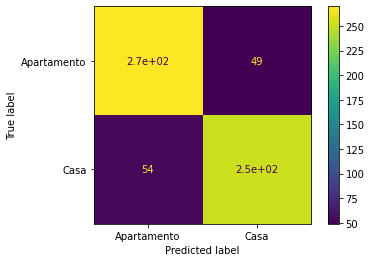

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(trained_model,X_test, y_test)


In [43]:
len(dados_preprocessed['tipo_imovel']), len(dados_preprocessed)

(3125, 3125)

Com base na matrix, podemos observar os numeros preditos para cada classe. 
É de suma importancia obsevar a matrix quando estamos trabalhando com algoritmos de classificação, pois isso nos mostra onde o modelo esta acertando ou não e com base nessa especie de relatório podemos ajustar o modelo a fim de que ele melhore sua performance. 

# *k-fold*

In [54]:
from sklearn.model_selection import cross_val_score

#O paâmetro cv indica quantas partições iremos criar. 

score = cross_val_score(modelo, X, y, cv=10)

print(f'score croos_validation {score.mean()}')


  

score croos_validation 0.8144087408863767


In [55]:
X = dados_preprocessed.drop('tipo_imovel', axis=1)
y = dados_preprocessed['tipo_imovel']

modelo_final = modelo.fit(X,y)

# E podemos agora colocar em produção e usá-lo
bairro = list(cod.transform(['Fragata'])[0])
predicao = modelo_final.predict([[2, 0, 1, 120] + bairro + [250000]])
print(predicao)

['Apartamento']
